In [1]:
!pip install -q tfds-nightly tensorflow matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 35.5 MB/s eta 0:00:00


In [2]:
#tfds.list_builders()
builder = tfds.builder('pneumonia_mnist')
# 1. Create the tfrecord files (no-op if already exists)
builder.download_and_prepare()
# 2. Load the `tf.data.Dataset`
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.UJ7J9P_1.0.0/pneumonia_mnist-train.tfrecord*...…

Generating val examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.UJ7J9P_1.0.0/pneumonia_mnist-val.tfrecord*...: …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.UJ7J9P_1.0.0/pneumonia_mnist-test.tfrecord*...:…

Dataset pneumonia_mnist downloaded and prepared to /root/tensorflow_datasets/pneumonia_mnist/1.0.0. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [3]:
images = ds.take(1)
for example in images:
  print(example)



{'image': <tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
array([[[141],
        [139],
        [123],
        [109],
        [110],
        [115],
        [129],
        [151],
        [172],
        [186],
        [207],
        [222],
        [226],
        [223],
        [223],
        [226],
        [227],
        [233],
        [222],
        [202],
        [183],
        [162],
        [150],
        [155],
        [127],
        [130],
        [135],
        [141]],

       [[126],
        [132],
        [125],
        [118],
        [120],
        [122],
        [131],
        [149],
        [163],
        [175],
        [195],
        [211],
        [216],
        [214],
        [215],
        [218],
        [221],
        [224],
        [210],
        [185],
        [164],
        [140],
        [126],
        [130],
        [136],
        [133],
        [132],
        [135]],

       [[128],
        [131],
        [123],
        [120],
        [127],
        [126],
     

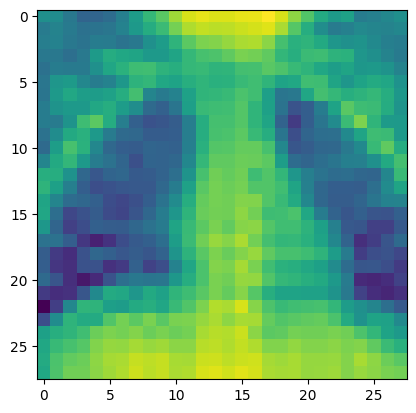

In [4]:
example = example["image"].numpy()
plt.imshow(example)


In [5]:
# Load as dictionary
ds = tfds.load('pneumonia_mnist', split='train', as_supervised=True)
ds = ds.take(10)

for image, label in ds:  # example is (image, label)
  print(image.shape, label)

(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)


In [6]:
# Load as dataframe
ds, info = tfds.load('pneumonia_mnist', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

,image,label
0,,0 (Normal)
1,,1 (Pneumonia)
2,,0 (Normal)
3,,1 (Pneumonia)


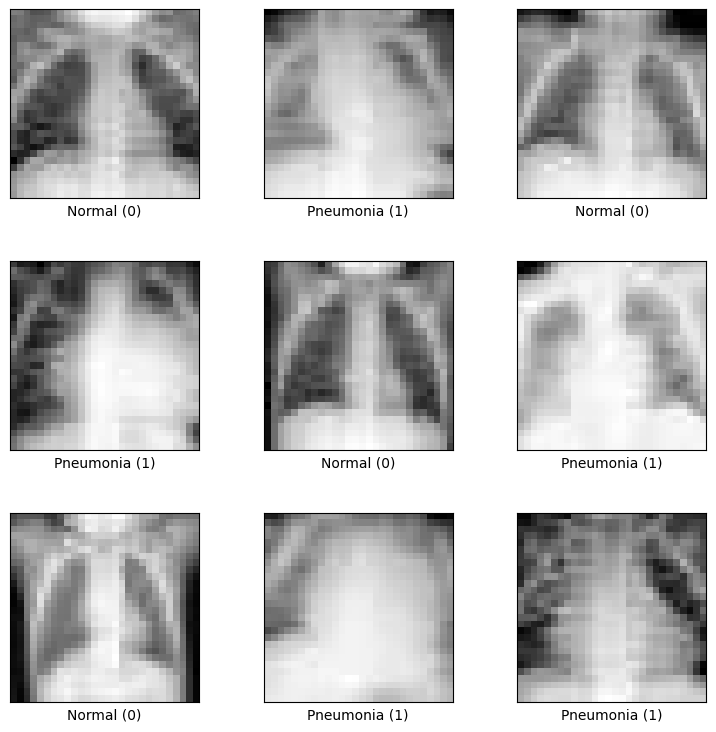

In [7]:
# Show examples
fig = tfds.show_examples(ds, info)

In [8]:
# Load dataset with access to the metadata
ds, info = tfds.load('pneumonia_mnist', with_info=True)
builder = tfds.builder('pneumonia_mnist')
info = builder.info
print(info)

tfds.core.DatasetInfo(
    name='pneumonia_mnist',
    full_name='pneumonia_mnist/1.0.0',
    description="""
    # MedMNIST Pneumonia Dataset
    
    The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray
    images. The task is binary-class classification of pneumonia against normal. The
    source training set is split with a ratio of 9:1 into training and validation
    set, and use its source validation set as the test set. The source images are
    gray-scale, and their sizes are (384–2,916) × (127–2,713). The images are
    center-cropped with a window size of length of the short edge and resized into 1
    × 28 × 28.
    """,
    homepage='https://medmnist.com//',
    data_dir='/root/tensorflow_datasets/pneumonia_mnist/1.0.0',
    file_format=tfrecord,
    download_size=3.98 MiB,
    dataset_size=3.66 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),

In [9]:
# Load training set as dataframe
ds_train, info_train = tfds.load('pneumonia_mnist', split='train', with_info=True)

tfds.as_dataframe(ds_train.take(5), info_train)
len(ds_train)
for example in ds_train:
  print(example)

Streaming output truncated to the last 5000 lines.
        [183],
        [169],
        [163],
        [160],
        [151],
        [146],
        [137],
        [120],
        [102],
        [ 88],
        [ 77],
        [ 76]],

       [[103],
        [113],
        [126],
        [138],
        [143],
        [143],
        [141],
        [140],
        [145],
        [148],
        [156],
        [166],
        [177],
        [185],
        [188],
        [189],
        [185],
        [172],
        [156],
        [148],
        [146],
        [140],
        [127],
        [115],
        [ 85],
        [ 79],
        [ 78],
        [ 85]],

       [[131],
        [137],
        [145],
        [151],
        [153],
        [152],
        [152],
        [151],
        [154],
        [157],
        [163],
        [171],
        [180],
        [186],
        [188],
        [188],
        [190],
        [180],
        [167],
        [159],
        [157],
        [152],
        [142],


In [10]:
# Load test set as dataframe
ds_test, info_test = tfds.load('pneumonia_mnist', split='test', with_info=True)

tfds.as_dataframe(ds_test.take(5), info_test)
len(ds_test)
for exapmle in ds_test:
  print(example)


Streaming output truncated to the last 5000 lines.
        [183],
        [180],
        [177],
        [177],
        [176],
        [172],
        [165],
        [159],
        [146],
        [115],
        [ 80],
        [ 66]],

       [[151],
        [162],
        [171],
        [174],
        [176],
        [179],
        [181],
        [179],
        [182],
        [182],
        [183],
        [186],
        [189],
        [190],
        [189],
        [187],
        [177],
        [177],
        [177],
        [176],
        [174],
        [170],
        [166],
        [164],
        [144],
        [132],
        [119],
        [114]],

       [[155],
        [165],
        [174],
        [177],
        [178],
        [181],
        [182],
        [181],
        [182],
        [182],
        [183],
        [186],
        [189],
        [190],
        [188],
        [186],
        [179],
        [179],
        [177],
        [174],
        [171],
        [167],
        [164],


In [12]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import tensorflow_datasets as tfds

# Loading the pneumonia_mnist dataset
ds_train, info_train = tfds.load('pneumonia_mnist', split='train', as_supervised=True, with_info=True)
ds_test = tfds.load('pneumonia_mnist', split='test', as_supervised=True)

In [14]:
# Preprocess the data
def preprocess(image, label):
    # Normalizing the images to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    # Resize to a consistent size (28x28x1, as this is the dataset's default size)
    image = tf.image.resize(image, (28, 28))
    return image, label

ds_train = ds_train.map(preprocess).batch(32).shuffle(1000)
ds_test = ds_test.map(preprocess).batch(32)

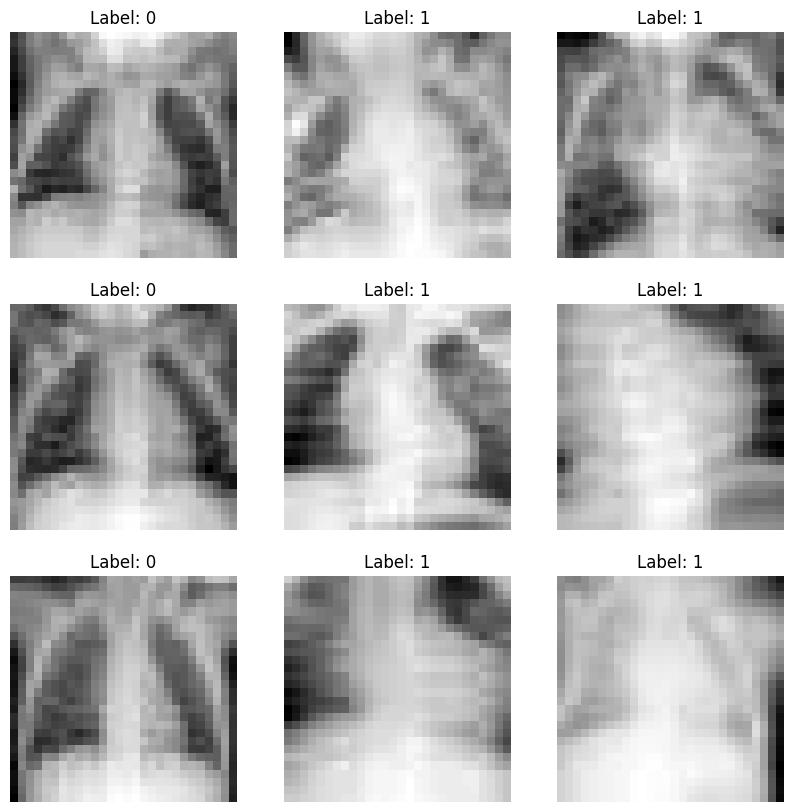

In [15]:
# Visualizing a few examples from the training dataset
for images, labels in ds_train.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
    plt.show()

refinement for solving overfitting

In [16]:
# Data Augmentation
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),   # Randomly flip images horizontally
    layers.RandomRotation(0.2),       # Randomly rotate images
])

In [17]:
# Build the CNN model with data augmentation and dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Define input_shape here
    data_augmentation,  # Apply data augmentation after the input layer
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Add dropout after pooling layer

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Add dropout after pooling layer

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),  # Add dropout before the final dense layer
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Display the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,737 (362.25 KB)

 Trainable params: 92,737 (362.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# Training the model
history = model.fit(ds_train, epochs=20, validation_data=ds_test)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.7347 - loss: 0.5668 - val_accuracy: 0.6811 - val_loss: 0.5295
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8476 - loss: 0.3659 - val_accuracy: 0.7212 - val_loss: 0.5291
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.8804 - loss: 0.2706 - val_accuracy: 0.8558 - val_loss: 0.3532
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9139 - loss: 0.2086 - val_accuracy: 0.8878 - val_loss: 0.3028
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9206 - loss: 0.2016 - val_accuracy: 0.8574 - val_loss: 0.3596
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9181 - loss: 0.2091 - val_accuracy: 0.8798 - val_loss: 0.3356
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.9165 - loss: 0.1993 - val_accuracy: 0.8798 - val_loss: 0.3093
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.9290 - loss: 0.1746 - 

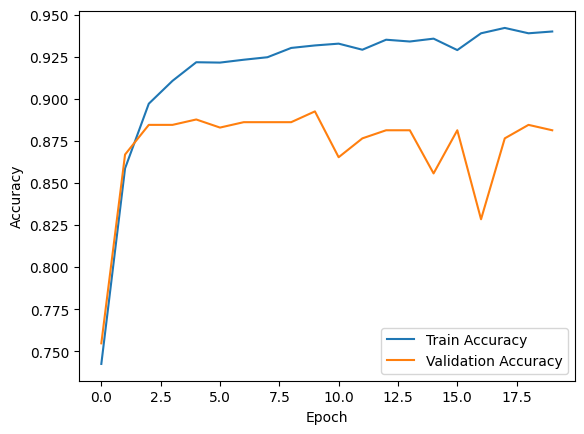

In [19]:
# Visualize the accuracy curve during training
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

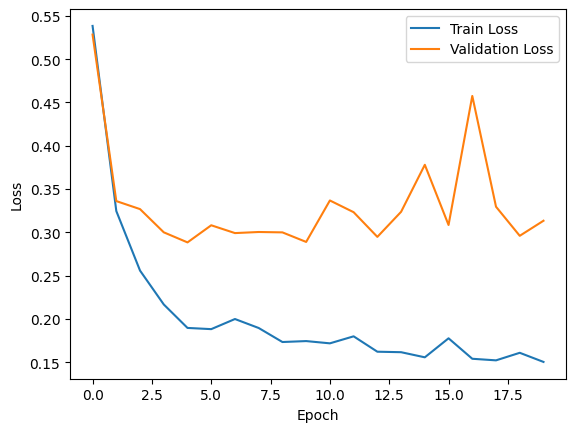

In [20]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(ds_test, verbose=2)
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

20/20 - 0s - 18ms/step - accuracy: 0.8814 - loss: 0.3134
Test Loss: 0.31
Test Accuracy: 88.14%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(ds_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to class labels

y_true = []
for image, label in ds_test:
  y_true.extend(label.numpy())


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'],
            yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Add user upload functionality using Google Colab's files.upload()
def predict_uploaded_image():
    # Prompt the user to upload an X-ray image
    print("Please upload an X-ray image to predict pneumonia presence.")
    uploaded = files.upload()  # Use Colab's file upload feature

    for file_name in uploaded.keys():
        # Load and preprocess the uploaded image
        image = load_img(file_name, color_mode="grayscale", target_size=(28, 28))
        plt.imshow(image, cmap='gray')
        plt.title("Uploaded X-ray Image")
        plt.axis('off')
        plt.show()

        image = img_to_array(image) / 255.0  # Normalize the image
        image = np.expand_dims(image, axis=0)  # Add batch dimension (1, 28, 28, 1)

        # Make a prediction
        prediction = model.predict(image)[0][0]
        if prediction > 0.5:
            print(f"Pneumonia detected! (Confidence: {prediction * 100:.2f}%)")
        else:
            print(f"No pneumonia detected. (Confidence: {(1 - prediction) * 100:.2f}%)")

Please upload an X-ray image to predict pneumonia presence.


Saving th.jpeg to th.jpeg


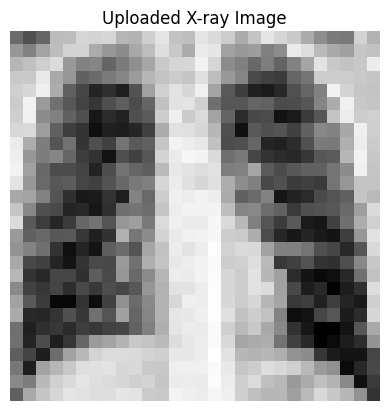

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Pneumonia detected! (Confidence: 93.88%)


In [ ]:
# Call the function to allow the user to upload an image and make a prediction
predict_uploaded_image()